In [1]:
import pathlib
import numpy as np
from scipy.io import loadmat
import scipy.io
import os

# Imports and Installing requirements


In [2]:
# ! pip install pandas
# ! pip install matplotlib
# ! pip install seaborn
# ! pip install sklearn
# ! pip install tensorflow
# ! pip install keras
# ! pip install torch
# ! pip install os

In [3]:
"""
# import os


# # delete all the csv files existing in the repo using python


# # Specify the directory path where the CSV files are located

# directory = "/"


# # Iterate over all the files in the directory

# for filename in os.listdir(directory):

#     # Check if the file is a CSV file

#     if filename.endswith(".csv"):

#         # Construct the file path

#         file_path = os.path.join(directory, filename)

#         # Delete the file

#         os.remove(file_path)
"""

'\n# import os\n\n\n# # delete all the csv files existing in the repo using python\n\n\n# # Specify the directory path where the CSV files are located\n\n# directory = "/"\n\n\n# # Iterate over all the files in the directory\n\n# for filename in os.listdir(directory):\n\n#     # Check if the file is a CSV file\n\n#     if filename.endswith(".csv"):\n\n#         # Construct the file path\n\n#         file_path = os.path.join(directory, filename)\n\n#         # Delete the file\n\n#         os.remove(file_path)\n'

In [4]:
import warnings

# Ignore warnings for collinearity and convergence
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [5]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.discriminant_analysis import (
    LinearDiscriminantAnalysis,
    QuadraticDiscriminantAnalysis,
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import (
    StandardScaler,
    LabelEncoder,
    MinMaxScaler,
    RobustScaler,
)
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.utils.validation import column_or_1d
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.datasets import load_iris
import numpy as np

In [6]:
data_dir = "datasets\ML_brainData"
desktop = pathlib.Path(data_dir)

In [7]:
dataset = []
for i in list(desktop.iterdir()):
    dataset.append(loadmat(i))

# Analysis for the first Person's fMRI


## Data Pre-processing


### Getting the Initial Data


First let's create a np-array with 21764 features and 2 outputs condition and word number or 1 output i.e word


In [8]:
mat_data = dataset[0]
mat_data_data = mat_data["data"]

In [9]:
nvoxels = mat_data["meta"][0][0]["nvoxels"][0][0]
print("The number of voxels are:", nvoxels)
ntrials = mat_data["meta"][0][0]["ntrials"][0][0]
print("The number of trials done are:", ntrials)

The number of voxels are: 21764
The number of trials done are: 360


In [10]:
data_firstPerson_withoutY = []
for i in range(0, len(mat_data_data)):
    data_firstPerson_withoutY.append(mat_data_data[i][0][0])
print(len(data_firstPerson_withoutY[0]))

21764


In [11]:
data_firstPerson_withoutY = np.array(data_firstPerson_withoutY)
data_firstPerson_withoutY

array([[-0.0268068 ,  0.68483384,  0.9132587 , ..., -0.67066825,
        -1.45709228, -0.85008493],
       [ 0.91838692,  1.04450499,  0.77500801, ..., -1.82493971,
        -1.49682133, -1.52025864],
       [ 0.40446271,  0.49151523,  0.32273739, ..., -0.03602276,
         0.67378845, -0.55942959],
       ...,
       [-0.80578564, -0.80386184, -0.56857835, ...,  0.36546083,
         0.10383134,  0.97633791],
       [ 0.64031084,  0.57636939,  0.50777017, ...,  1.01490866,
         0.88595603,  0.39234203],
       [ 0.53591841,  0.83507612,  0.46409542, ...,  0.09621749,
        -0.17719461,  0.42357178]])

In [12]:
DF_withoutLabels = pd.DataFrame(data_firstPerson_withoutY)
# save the dataframe as a csv file without indexing
DF_withoutLabels.to_csv("data_firstPerson_withoutY.csv", index=False)
DF_withoutLabels

0         1         2         3         4         5         6      \
0   -0.026807  0.684834  0.913259 -0.607473 -0.035652  0.831592  0.036146   
1    0.918387  1.044505  0.775008  0.446292  0.573288  0.296588  0.279037   
2    0.404463  0.491515  0.322737  0.565998  0.910144 -0.022672 -0.265589   
3    0.154143  0.090534  0.126065  0.851853  0.928996  0.568791  0.043317   
4    0.022657  0.066583  0.062565 -0.176771 -0.507001  0.426824 -0.443048   
..        ...       ...       ...       ...       ...       ...       ...   
355  0.330510  0.082751 -0.564986 -0.783048 -0.649798 -0.519003 -0.144469   
356 -0.437366 -0.199172 -0.021808 -0.100441 -0.047161  0.514779 -0.955829   
357 -0.805786 -0.803862 -0.568578 -0.009557  0.061027 -0.602578 -0.333806   
358  0.640311  0.576369  0.507770  0.785016  1.164965  0.152330  0.652013   
359  0.535918  0.835076  0.464095 -0.263199  0.344567 -0.221691 -0.618091   

        7         8         9      ...     21754     21755     21756  \
0    0.103328  0.409886  0.377686  ... -1.659966  0.492116  2.379579   
1    0.688394  0.594526  0.285484  ... -2.874887 -1.267140 -0.787237   
2   -0.320328 -0.144110  0.282993  ... -0.531833 -1.218505 -0.607947   
3    0.174323  0.660360  0.907186  ...  0.634760  0.154217  1.007080   
4   -0.417312  0.199288  0.620498  ...  0.642981  1.752290  0.554075   
..        ...       ...       ...  ...       ...       ...       ...   
355  0.062276 -0.280306 -0.686704  ...  0.085484 -0.369586  1.337798   
356 -0.414140  0.144488  0.380802  ... -0.759127 -1.783479 -0.272532   
357 -0.546193 -1.111860 -1.289683  ...  1.323663  2.428861  1.451445   
358  0.236407 -0.028768  0.065255  ...  0.412992 -0.305218  0.767470   
359 -0.176464  0.361088  0.613485  ... -0.281576 -0.958057  0.741373   

        21757     21758     21759     21760     21761     21762     21763  
0   -0.373850 -1.888726  1.269766  0.644990 -0.670668 -1.457092 -0.850085  
1   -1.540824 -1.145620  0.315128 -1.567767 -1.824940 -1.496821 -1.520259  
2   -0.549644 -0.066790 -0.812939 -0.813185 -0.036023  0.673788 -0.559430  
3   -0.464818 -0.352520  1.451367  0.947464  0.376507  0.369274  1.379871  
4    2.382414  0.980933  1.072208  1.171389  0.802962  0.536364  0.772280  
..        ...       ...       ...       ...       ...       ...       ...  
355  0.595503 -0.037047  0.248788  0.387192  0.241775 -0.240881  0.073417  
356 -0.194764 -0.335785  0.563383  0.753249  0.595848  0.251088 -0.204628  
357  1.555452  0.258751  1.229327  1.093605  0.365461  0.103831  0.976338  
358 -0.416772 -0.086066  0.390656  0.604469  1.014909  0.885956  0.392342  
359 -0.814091 -0.195442  0.325111  0.334351  0.096217 -0.177195  0.423572  

[360 rows x 21764 columns]

In [13]:
data_firstPerson_Y = []
resultData = mat_data["info"][0]
for i in range(0, len(resultData)):
    data_firstPerson_Y.append(resultData[i]["cond_number"][0])
data_firstPerson_Y = np.array(data_firstPerson_Y)
for i in data_firstPerson_Y:
    print(i, end=" ")
# print(data_firstPerson_Y)

[10] [4] [10] [10] [5] [11] [4] [7] [2] [9] [13] [8] [12] [3] [3] [7] [9] [13] [4] [6] [8] [11] [6] [5] [6] [4] [6] [12] [13] [13] [2] [12] [8] [6] [3] [5] [11] [9] [4] [9] [2] [9] [11] [2] [8] [12] [13] [3] [7] [11] [5] [3] [12] [10] [7] [5] [7] [8] [2] [10] [13] [3] [2] [13] [8] [11] [2] [3] [9] [11] [9] [4] [10] [4] [4] [11] [5] [5] [6] [2] [10] [9] [6] [12] [12] [7] [8] [6] [3] [7] [10] [11] [4] [5] [5] [2] [6] [8] [2] [11] [7] [8] [6] [7] [7] [13] [8] [3] [4] [9] [12] [5] [13] [10] [3] [12] [9] [10] [13] [12] [6] [2] [13] [2] [11] [5] [6] [2] [9] [13] [7] [8] [4] [3] [3] [10] [10] [9] [4] [9] [10] [7] [8] [12] [4] [13] [8] [11] [7] [5] [12] [13] [3] [5] [12] [5] [2] [11] [11] [8] [6] [4] [9] [6] [7] [2] [8] [13] [5] [7] [3] [12] [10] [12] [4] [3] [10] [9] [11] [6] [13] [6] [5] [11] [7] [10] [10] [12] [4] [7] [5] [10] [3] [13] [7] [11] [9] [4] [2] [8] [6] [9] [12] [9] [4] [4] [10] [8] [8] [6] [13] [3] [12] [9] [7] [10] [11] [3] [8] [9] [3] [5] [5] [2] [4] [8] [2] [12] [12] [13] [2]

In [14]:
data_firstPerson = np.append(data_firstPerson_withoutY, data_firstPerson_Y, axis=1)
DF_data_firstPerson = pd.DataFrame(data_firstPerson)

DF_data_firstPerson.to_csv("data_firstPerson_withY_withoutLabels.csv", index=False)
DF_data_firstPerson

0         1         2         3         4         5         6      \
0   -0.026807  0.684834  0.913259 -0.607473 -0.035652  0.831592  0.036146   
1    0.918387  1.044505  0.775008  0.446292  0.573288  0.296588  0.279037   
2    0.404463  0.491515  0.322737  0.565998  0.910144 -0.022672 -0.265589   
3    0.154143  0.090534  0.126065  0.851853  0.928996  0.568791  0.043317   
4    0.022657  0.066583  0.062565 -0.176771 -0.507001  0.426824 -0.443048   
..        ...       ...       ...       ...       ...       ...       ...   
355  0.330510  0.082751 -0.564986 -0.783048 -0.649798 -0.519003 -0.144469   
356 -0.437366 -0.199172 -0.021808 -0.100441 -0.047161  0.514779 -0.955829   
357 -0.805786 -0.803862 -0.568578 -0.009557  0.061027 -0.602578 -0.333806   
358  0.640311  0.576369  0.507770  0.785016  1.164965  0.152330  0.652013   
359  0.535918  0.835076  0.464095 -0.263199  0.344567 -0.221691 -0.618091   

        7         8         9      ...     21755     21756     21757  \
0    0.103328  0.409886  0.377686  ...  0.492116  2.379579 -0.373850   
1    0.688394  0.594526  0.285484  ... -1.267140 -0.787237 -1.540824   
2   -0.320328 -0.144110  0.282993  ... -1.218505 -0.607947 -0.549644   
3    0.174323  0.660360  0.907186  ...  0.154217  1.007080 -0.464818   
4   -0.417312  0.199288  0.620498  ...  1.752290  0.554075  2.382414   
..        ...       ...       ...  ...       ...       ...       ...   
355  0.062276 -0.280306 -0.686704  ... -0.369586  1.337798  0.595503   
356 -0.414140  0.144488  0.380802  ... -1.783479 -0.272532 -0.194764   
357 -0.546193 -1.111860 -1.289683  ...  2.428861  1.451445  1.555452   
358  0.236407 -0.028768  0.065255  ... -0.305218  0.767470 -0.416772   
359 -0.176464  0.361088  0.613485  ... -0.958057  0.741373 -0.814091   

        21758     21759     21760     21761     21762     21763  21764  
0   -1.888726  1.269766  0.644990 -0.670668 -1.457092 -0.850085   10.0  
1   -1.145620  0.315128 -1.567767 -1.824940 -1.496821 -1.520259    4.0  
2   -0.066790 -0.812939 -0.813185 -0.036023  0.673788 -0.559430   10.0  
3   -0.352520  1.451367  0.947464  0.376507  0.369274  1.379871   10.0  
4    0.980933  1.072208  1.171389  0.802962  0.536364  0.772280    5.0  
..        ...       ...       ...       ...       ...       ...    ...  
355 -0.037047  0.248788  0.387192  0.241775 -0.240881  0.073417    5.0  
356 -0.335785  0.563383  0.753249  0.595848  0.251088 -0.204628    4.0  
357  0.258751  1.229327  1.093605  0.365461  0.103831  0.976338    2.0  
358 -0.086066  0.390656  0.604469  1.014909  0.885956  0.392342   11.0  
359 -0.195442  0.325111  0.334351  0.096217 -0.177195  0.423572   13.0  

[360 rows x 21765 columns]

### Labelling data according to the brain regions


- Functions to convert the data into MNI and label them according to the MNI coordinates
- Extracting the MNI coordinates and AAL labels for the data
- Mapping the data to the labels and grouping it


#### Functions to convert the data into MNI and label them according to the MNI coordinates


In [15]:
def get_mni_coordinates(v):
    """
    Get MNI coordinates for an array of N voxels.

    Parameters:
        v (ndarray): Nx3 array of VOXEL COORDINATES (voxel space).

    Returns:
        ndarray: Nx3 array of MNI points.
    """
    # Transformation matrix from vox coord to MNI coord
    transformToXYZmm = np.array(
        [[-3.125, 0, 0, 81.250], [0, 3.125, 0, -115.625], [0, 0, 6, -54.000]]
    )

    # Append a column of ones to v
    ones_column = np.ones((v.shape[0], 1))
    v_homogeneous = np.hstack((v, ones_column))

    # Perform the transformation
    p = np.dot(v_homogeneous, transformToXYZmm.T)[:, :3]

    return p


# Example usage:
voxel_coordinates = np.array([[45, 30, 12]])
mni_coordinates = get_mni_coordinates(voxel_coordinates)
print("MNI Coordinates:", mni_coordinates)

print("The shape of MNI coordinates are:", mni_coordinates.shape)  # 1x3

MNI Coordinates: [[-59.375 -21.875  18.   ]]
The shape of MNI coordinates are: (1, 3)


In [16]:
file_dir = "datasets\ccbi_aal_atlas.mat"
atlas_data = scipy.io.loadmat(file_dir)
atlas_data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNX86, Created on: Tue Jan  6 13:15:54 2009',
 '__version__': '1.0',
 '__globals__': [],
 'Y': array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0,

In [17]:
label_data = atlas_data["label"]
print("The shape of label data is:", label_data.shape)  # 1x117
print("The length of label data is:", len(label_data[0]))  # 117

The shape of label data is: (1, 117)
The length of label data is: 117


In [18]:
def get_aal_labels(p):
    """
    Get AAL labels for an array of N MNI points (mm).

    Parameters:
        p (ndarray): Nx3 array of MNI points.

    Returns:
        list: List of AAL labels.
    """
    # Load AAL atlas
    atlas_data = scipy.io.loadmat(file_dir)
    vinv = atlas_data["vinv"]
    Y = atlas_data["Y"]
    label = atlas_data["label"]
    id = atlas_data["id"]

    # Initialize variables
    pv = np.zeros((p.shape[0], 4))
    z = np.zeros(p.shape[0], dtype=int)
    L = []

    # Get labels
    for j in range(p.shape[0]):
        pv[j, :] = np.round(np.append(p[j, :], 1))
        pv[j, :] = np.dot(pv[j, :], vinv.T)
        z[j] = Y[int(pv[j, 0]), int(pv[j, 1]), int(pv[j, 2])]
        L.append(label[np.where(id == z[j])][0])

    return L


# Example usage:
mni_points = np.array([[-32, -42, -18], [16, -54, 14], [-40, -100, 30]])
aal_labels = get_aal_labels(mni_points)
print("AAL Labels:")
aal_labels

AAL Labels:


[array([[array(['Fusiform_L'], dtype='<U10')]], dtype=object),
 array([[array(['Precuneus_R'], dtype='<U11')]], dtype=object),
 array([[array(['Not_labelled'], dtype='<U12')]], dtype=object)]

#### Extracting the MNI coordinates and AAL labels for the data


In [19]:
coordinates = mat_data["meta"][0][0]["colToCoord"]
print("The total coordinates are:", len(coordinates))
print(coordinates[0:3])

The total coordinates are: 21764
[[31 10  1]
 [32 10  1]
 [33 10  1]]


In [20]:
MNI_coordinates = get_mni_coordinates(coordinates)
print("The total coordinates are:", len(MNI_coordinates))
print(MNI_coordinates[0:3])

The total coordinates are: 21764
[[-15.625 -84.375 -48.   ]
 [-18.75  -84.375 -48.   ]
 [-21.875 -84.375 -48.   ]]


In [21]:
AAL_labels = get_aal_labels(MNI_coordinates)
print("The total labels are:", len(AAL_labels))
AAL_labels[0:3]

The total labels are: 21764


[array([[array(['Not_labelled'], dtype='<U12')]], dtype=object),
 array([[array(['Cerebelum_Crus2_L'], dtype='<U17')]], dtype=object),
 array([[array(['Cerebelum_Crus2_L'], dtype='<U17')]], dtype=object)]

In [22]:
unique_labels = np.unique(AAL_labels)
print("Length of unique labels are : ", len(unique_labels))
print("The unique Labels are :")
for i, label in enumerate(unique_labels.tolist()):
    print(i, ") ", label[0], sep="")

Length of unique labels are :  117
The unique Labels are :
0) Amygdala_L
1) Amygdala_R
2) Angular_L
3) Angular_R
4) Calcarine_L
5) Calcarine_R
6) Caudate_L
7) Caudate_R
8) Cerebelum_10_L
9) Cerebelum_10_R
10) Cerebelum_3_L
11) Cerebelum_3_R
12) Cerebelum_4_5_L
13) Cerebelum_4_5_R
14) Cerebelum_6_L
15) Cerebelum_6_R
16) Cerebelum_7b_L
17) Cerebelum_7b_R
18) Cerebelum_8_L
19) Cerebelum_8_R
20) Cerebelum_9_L
21) Cerebelum_9_R
22) Cerebelum_Crus1_L
23) Cerebelum_Crus1_R
24) Cerebelum_Crus2_L
25) Cerebelum_Crus2_R
26) Cingulum_Ant_L
27) Cingulum_Ant_R
28) Cingulum_Mid_L
29) Cingulum_Mid_R
30) Cingulum_Post_L
31) Cingulum_Post_R
32) Cuneus_L
33) Cuneus_R
34) Frontal_Inf_Oper_L
35) Frontal_Inf_Oper_R
36) Frontal_Inf_Orb_L
37) Frontal_Inf_Orb_R
38) Frontal_Inf_Tri_L
39) Frontal_Inf_Tri_R
40) Frontal_Med_Orb_L
41) Frontal_Med_Orb_R
42) Frontal_Mid_L
43) Frontal_Mid_Orb_L
44) Frontal_Mid_Orb_R
45) Frontal_Mid_R
46) Frontal_Sup_L
47) Frontal_Sup_Medial_L
48) Frontal_Sup_Medial_R
49) Frontal_Sup_O

In [23]:
## Making the string array from the output of the AAL label conversion function
AAL_labels[0][0][0][0]
AAL_labels_modified = []
count = 0
for i in range(0, len(AAL_labels)):
    count += 1
    AAL_labels_modified.append(AAL_labels[i][0][0][0])

In [24]:
AAL_labels[:10]

[array([[array(['Not_labelled'], dtype='<U12')]], dtype=object),
 array([[array(['Cerebelum_Crus2_L'], dtype='<U17')]], dtype=object),
 array([[array(['Cerebelum_Crus2_L'], dtype='<U17')]], dtype=object),
 array([[array(['Cerebelum_Crus2_L'], dtype='<U17')]], dtype=object),
 array([[array(['Cerebelum_Crus2_L'], dtype='<U17')]], dtype=object),
 array([[array(['Not_labelled'], dtype='<U12')]], dtype=object),
 array([[array(['Not_labelled'], dtype='<U12')]], dtype=object),
 array([[array(['Not_labelled'], dtype='<U12')]], dtype=object),
 array([[array(['Cerebelum_Crus2_L'], dtype='<U17')]], dtype=object),
 array([[array(['Cerebelum_Crus2_L'], dtype='<U17')]], dtype=object)]

In [25]:
AAL_labels_modified[:10]

['Not_labelled',
 'Cerebelum_Crus2_L',
 'Cerebelum_Crus2_L',
 'Cerebelum_Crus2_L',
 'Cerebelum_Crus2_L',
 'Not_labelled',
 'Not_labelled',
 'Not_labelled',
 'Cerebelum_Crus2_L',
 'Cerebelum_Crus2_L']

#### Mapping the data to the labels and grouping it


In [26]:
# read the csv file into a dataframe
DF_withoutLabels = pd.read_csv("data_firstPerson_withoutY.csv")
# drop the index from the dataframe
DF_withoutLabels

0         1         2         3         4         5         6  \
0   -0.026807  0.684834  0.913259 -0.607473 -0.035652  0.831592  0.036146   
1    0.918387  1.044505  0.775008  0.446292  0.573288  0.296588  0.279037   
2    0.404463  0.491515  0.322737  0.565998  0.910144 -0.022672 -0.265589   
3    0.154143  0.090534  0.126065  0.851853  0.928996  0.568791  0.043317   
4    0.022657  0.066583  0.062565 -0.176771 -0.507001  0.426824 -0.443048   
..        ...       ...       ...       ...       ...       ...       ...   
355  0.330510  0.082751 -0.564986 -0.783048 -0.649798 -0.519003 -0.144469   
356 -0.437366 -0.199172 -0.021808 -0.100441 -0.047161  0.514779 -0.955829   
357 -0.805786 -0.803862 -0.568578 -0.009557  0.061027 -0.602578 -0.333806   
358  0.640311  0.576369  0.507770  0.785016  1.164965  0.152330  0.652013   
359  0.535918  0.835076  0.464095 -0.263199  0.344567 -0.221691 -0.618091   

            7         8         9  ...     21754     21755     21756  \
0    0.103328  0.409886  0.377686  ... -1.659966  0.492116  2.379579   
1    0.688394  0.594526  0.285484  ... -2.874887 -1.267140 -0.787237   
2   -0.320328 -0.144110  0.282993  ... -0.531833 -1.218505 -0.607947   
3    0.174323  0.660360  0.907186  ...  0.634760  0.154217  1.007080   
4   -0.417312  0.199288  0.620498  ...  0.642981  1.752290  0.554075   
..        ...       ...       ...  ...       ...       ...       ...   
355  0.062276 -0.280306 -0.686704  ...  0.085484 -0.369586  1.337798   
356 -0.414140  0.144488  0.380802  ... -0.759127 -1.783479 -0.272532   
357 -0.546193 -1.111860 -1.289683  ...  1.323663  2.428861  1.451445   
358  0.236407 -0.028768  0.065255  ...  0.412992 -0.305218  0.767470   
359 -0.176464  0.361088  0.613485  ... -0.281576 -0.958057  0.741373   

        21757     21758     21759     21760     21761     21762     21763  
0   -0.373850 -1.888726  1.269766  0.644990 -0.670668 -1.457092 -0.850085  
1   -1.540824 -1.145620  0.315128 -1.567767 -1.824940 -1.496821 -1.520259  
2   -0.549644 -0.066790 -0.812939 -0.813185 -0.036023  0.673788 -0.559430  
3   -0.464818 -0.352520  1.451367  0.947464  0.376507  0.369274  1.379871  
4    2.382414  0.980933  1.072208  1.171389  0.802962  0.536364  0.772280  
..        ...       ...       ...       ...       ...       ...       ...  
355  0.595503 -0.037047  0.248788  0.387192  0.241775 -0.240881  0.073417  
356 -0.194764 -0.335785  0.563383  0.753249  0.595848  0.251088 -0.204628  
357  1.555452  0.258751  1.229327  1.093605  0.365461  0.103831  0.976338  
358 -0.416772 -0.086066  0.390656  0.604469  1.014909  0.885956  0.392342  
359 -0.814091 -0.195442  0.325111  0.334351  0.096217 -0.177195  0.423572  

[360 rows x 21764 columns]

In [27]:
print(len(AAL_labels_modified))
print(len(DF_withoutLabels.columns))

21764
21764


In [28]:
# Add AAL_labels as a new row
DF_withoutLabels.loc["labels"] = AAL_labels_modified
DF_withoutLabels

0                  1                  2                  3  \
0          -0.026807           0.684834           0.913259          -0.607473   
1           0.918387           1.044505           0.775008           0.446292   
2           0.404463           0.491515           0.322737           0.565998   
3           0.154143           0.090534           0.126065           0.851853   
4           0.022657           0.066583           0.062565          -0.176771   
...              ...                ...                ...                ...   
356        -0.437366          -0.199172          -0.021808          -0.100441   
357        -0.805786          -0.803862          -0.568578          -0.009557   
358         0.640311           0.576369            0.50777           0.785016   
359         0.535918           0.835076           0.464095          -0.263199   
labels  Not_labelled  Cerebelum_Crus2_L  Cerebelum_Crus2_L  Cerebelum_Crus2_L   

                        4             5             6             7  \
0               -0.035652      0.831592      0.036146      0.103328   
1                0.573288      0.296588      0.279037      0.688394   
2                0.910144     -0.022672     -0.265589     -0.320328   
3                0.928996      0.568791      0.043317      0.174323   
4               -0.507001      0.426824     -0.443048     -0.417312   
...                   ...           ...           ...           ...   
356             -0.047161      0.514779     -0.955829      -0.41414   
357              0.061027     -0.602578     -0.333806     -0.546193   
358              1.164965       0.15233      0.652013      0.236407   
359              0.344567     -0.221691     -0.618091     -0.176464   
labels  Cerebelum_Crus2_L  Not_labelled  Not_labelled  Not_labelled   

                        8                  9  ...         21754         21755  \
0                0.409886           0.377686  ...     -1.659966      0.492116   
1                0.594526           0.285484  ...     -2.874887      -1.26714   
2                -0.14411           0.282993  ...     -0.531833     -1.218505   
3                 0.66036           0.907186  ...       0.63476      0.154217   
4                0.199288           0.620498  ...      0.642981       1.75229   
...                   ...                ...  ...           ...           ...   
356              0.144488           0.380802  ...     -0.759127     -1.783479   
357              -1.11186          -1.289683  ...      1.323663      2.428861   
358             -0.028768           0.065255  ...      0.412992     -0.305218   
359              0.361088           0.613485  ...     -0.281576     -0.958057   
labels  Cerebelum_Crus2_L  Cerebelum_Crus2_L  ...  Not_labelled  Not_labelled   

               21756         21757         21758         21759         21760  \
0           2.379579      -0.37385     -1.888726      1.269766       0.64499   
1          -0.787237     -1.540824      -1.14562      0.315128     -1.567767   
2          -0.607947     -0.549644      -0.06679     -0.812939     -0.813185   
3            1.00708     -0.464818      -0.35252      1.451367      0.947464   
4           0.554075      2.382414      0.980933      1.072208      1.171389   
...              ...           ...           ...           ...           ...   
356        -0.272532     -0.194764     -0.335785      0.563383      0.753249   
357         1.451445      1.555452      0.258751      1.229327      1.093605   
358          0.76747     -0.416772     -0.086066      0.390656      0.604469   
359         0.741373     -0.814091     -0.195442      0.325111      0.334351   
labels  Not_labelled  Not_labelled  Not_labelled  Not_labelled  Not_labelled   

               21761         21762         21763  
0          -0.670668     -1.457092     -0.850085  
1           -1.82494     -1.496821     -1.520259  
2          -0.036023      0.673788      -0.55943  
3           0.376507      0.369274      1.379871  
4   

In [29]:
DF_withoutLabels.to_csv(
    "data_firstPerson_withoutY_withLabels_ungrouped.csv", index=False
)

In [30]:
labels_row = DF_withoutLabels.loc["labels"]
# Group the DataFrame by the 'labels' row and take the mean
grouped_df_withLabels = DF_withoutLabels.groupby(labels_row, axis=1).mean()
grouped_df_withLabels

labels  Amygdala_L  Amygdala_R  Angular_L  Angular_R  Calcarine_L  \
0        -0.012100    0.127622   0.317062   0.440933     0.982531   
1         0.184056   -0.252383   0.495670   0.268853     0.541290   
2        -0.026768    0.080071   0.282150   0.123677     0.316287   
3         0.349658    0.278891  -0.038872   0.051120     0.468914   
4         0.071451   -0.138541  -0.290449  -0.082056     0.861988   
..             ...         ...        ...        ...          ...   
355      -0.304918   -0.216347  -0.391553  -0.328098     0.760020   
356      -0.604440   -0.640764  -0.290656  -0.194727     0.587302   
357      -0.339885   -0.027879  -0.226727  -0.315013     0.485950   
358      -0.087675    0.015724  -0.320493  -0.096281     0.305148   
359      -0.583763   -0.325472   0.238563   0.222808     0.516925   

labels  Calcarine_R  Caudate_L  Caudate_R  Cerebelum_10_L  Cerebelum_10_R  \
0          1.007493   0.527289   0.697380       -0.452706        0.112530   
1          0.385210   0.151791   0.061421       -0.137234       -0.151990   
2          0.473524   0.191545   0.268181        0.215842       -0.007734   
3          0.533926   0.302625   0.638368        0.128229       -0.021630   
4          0.837882   0.260126   0.170274        0.251325        0.313872   
..              ...        ...        ...             ...             ...   
355        0.707223  -0.013529  -0.088941        0.072223       -0.223912   
356        0.777338   0.063159   0.167635        0.098304        0.018715   
357        0.449820  -0.047313  -0.207899       -0.243778       -0.083369   
358        0.373391   0.648025   0.656058        0.018138        0.073058   
359        0.623588  -0.111869  -0.047183        0.225140        0.019417   

labels  ...  Thalamus_L  Thalamus_R  Vermis_10  Vermis_1_2  Vermis_3  \
0       ...   -0.039782    0.046021  -0.402737   -0.304329  0.108593   
1       ...    0.044482   -0.282987  -0.918588   -0.040708 -0.029827   
2       ...    0.229800    0.086662  -0.084191   -0.005997  0.025533   
3       ...    0.160389   -0.017670  -0.656971   -0.307707  0.235982   
4       ...    0.324789    0.184883   0.290392    0.159835  0.244467   
..      ...         ...         ...        ...         ...       ...   
355     ...    0.017763   -0.026142  -0.034494   -0.155840 -0.143455   
356     ...   -0.173167   -0.049110   0.114216   -0.222488 -0.106257   
357     ...    0.049297   -0.222177  -0.701982   -0.453526 -0.204876   
358     ...   -0.055691   -0.190539  -0.058743    0.152624 -0.512153   
359     ...   -0.086967   -0.244091  -0.315857   -0.167636 -0.065290   

labels  Vermis_4_5  Vermis_6  Vermis_7  Vermis_8  Vermis_9  
0         0.041929  0.218866  0.192530 -0.166507 -0.141913  
1         0.101779  0.155766  0.424487  0.118813  0.009467  
2        -0.004611  0.339622  0.349004  0.021322 -0.097248  
3         0.038905  0.133213  0.675041 -0.030475 -0.393777  
4         0.026842  0.410277  0.282093  0.330347  0.219398  
..             ...       ...       ...       ...       ...  
355       0.115667 -0.010817  0.069590 -0.169807  0.428491  
356      -0.120006  0.073656  0.133038 -0.247422  0.121031  
357       0.111536  0.302387  0.631713 -0.141436 -0.227079  
358      -0.132577  0.211198  0.468037 -0.055674 -0.345644  
359       0.107785  0.166520  0.203149 -0.148328 -0.189036  

[360 rows x 117 columns]

In [31]:
# save the data to csv file
grouped_df_withLabels.to_csv("data_firstPerson_withoutY_withLabels_grouped.csv")

## Models based on the data without Labels

#### No reduction in number of features


Models Tried on the data

- Logistic regression
- LDA
- QDA
- Random Forest
- Naive Bayes
- KNN
- SVM
- SGD


### Reading Data


In [32]:
# read data from csv file
DF_data_firstPerson = pd.read_csv("data_firstPerson_withoutY.csv")

In [33]:
Y_arr = []
resultData = mat_data["info"][0]
for i in range(0, len(resultData)):
    Y_arr.append([resultData[i]["cond_number"][0][0], resultData[i]["word_number"][0][0]]
)
Y_arr = np.array(Y_arr)
for i in Y_arr:
    print(i, end=" ")

[10  3] [4 2] [10  1] [10  2] [5 5] [11  5] [4 3] [7 3] [2 3] [9 4] [13  4] [8 3] [12  5] [3 3] [3 2] [7 4] [9 5] [13  5] [4 1] [6 3] [8 1] [11  4] [6 1] [5 3] [6 2] [4 5] [6 5] [12  3] [13  1] [13  3] [2 1] [12  2] [8 4] [6 4] [3 1] [5 1] [11  3] [9 3] [4 4] [9 2] [2 5] [9 1] [11  1] [2 2] [8 2] [12  4] [13  2] [3 4] [7 2] [11  2] [5 4] [3 5] [12  1] [10  5] [7 5] [5 2] [7 1] [8 5] [2 4] [10  4] [13  4] [3 4] [2 2] [13  3] [8 3] [11  4] [2 4] [3 1] [9 1] [11  2] [9 5] [4 2] [10  2] [4 5] [4 1] [11  1] [5 5] [5 1] [6 1] [2 3] [10  4] [9 2] [6 4] [12  1] [12  3] [7 3] [8 4] [6 3] [3 5] [7 2] [10  1] [11  3] [4 3] [5 2] [5 4] [2 1] [6 5] [8 1] [2 5] [11  5] [7 5] [8 2] [6 2] [7 1] [7 4] [13  5] [8 5] [3 3] [4 4] [9 3] [12  2] [5 3] [13  1] [10  3] [3 2] [12  5] [9 4] [10  5] [13  2] [12  4] [6 2] [2 1] [13  2] [2 5] [11  4] [5 4] [6 4] [2 3] [9 4] [13  5] [7 2] [8 4] [4 4] [3 1] [3 5] [10  2] [10  3] [9 5] [4 1] [9 1] [10  5] [7 5] [8 2] [12  4] [4 3] [13  1] [8 5] [11  5] [7 4] [5 5] [1

In [34]:
X = DF_data_firstPerson
y = pd.DataFrame(Y_arr, columns=["cond_number", "word_number"])
X

0         1         2         3         4         5         6  \
0   -0.026807  0.684834  0.913259 -0.607473 -0.035652  0.831592  0.036146   
1    0.918387  1.044505  0.775008  0.446292  0.573288  0.296588  0.279037   
2    0.404463  0.491515  0.322737  0.565998  0.910144 -0.022672 -0.265589   
3    0.154143  0.090534  0.126065  0.851853  0.928996  0.568791  0.043317   
4    0.022657  0.066583  0.062565 -0.176771 -0.507001  0.426824 -0.443048   
..        ...       ...       ...       ...       ...       ...       ...   
355  0.330510  0.082751 -0.564986 -0.783048 -0.649798 -0.519003 -0.144469   
356 -0.437366 -0.199172 -0.021808 -0.100441 -0.047161  0.514779 -0.955829   
357 -0.805786 -0.803862 -0.568578 -0.009557  0.061027 -0.602578 -0.333806   
358  0.640311  0.576369  0.507770  0.785016  1.164965  0.152330  0.652013   
359  0.535918  0.835076  0.464095 -0.263199  0.344567 -0.221691 -0.618091   

            7         8         9  ...     21754     21755     21756  \
0    0.103328  0.409886  0.377686  ... -1.659966  0.492116  2.379579   
1    0.688394  0.594526  0.285484  ... -2.874887 -1.267140 -0.787237   
2   -0.320328 -0.144110  0.282993  ... -0.531833 -1.218505 -0.607947   
3    0.174323  0.660360  0.907186  ...  0.634760  0.154217  1.007080   
4   -0.417312  0.199288  0.620498  ...  0.642981  1.752290  0.554075   
..        ...       ...       ...  ...       ...       ...       ...   
355  0.062276 -0.280306 -0.686704  ...  0.085484 -0.369586  1.337798   
356 -0.414140  0.144488  0.380802  ... -0.759127 -1.783479 -0.272532   
357 -0.546193 -1.111860 -1.289683  ...  1.323663  2.428861  1.451445   
358  0.236407 -0.028768  0.065255  ...  0.412992 -0.305218  0.767470   
359 -0.176464  0.361088  0.613485  ... -0.281576 -0.958057  0.741373   

        21757     21758     21759     21760     21761     21762     21763  
0   -0.373850 -1.888726  1.269766  0.644990 -0.670668 -1.457092 -0.850085  
1   -1.540824 -1.145620  0.315128 -1.567767 -1.824940 -1.496821 -1.520259  
2   -0.549644 -0.066790 -0.812939 -0.813185 -0.036023  0.673788 -0.559430  
3   -0.464818 -0.352520  1.451367  0.947464  0.376507  0.369274  1.379871  
4    2.382414  0.980933  1.072208  1.171389  0.802962  0.536364  0.772280  
..        ...       ...       ...       ...       ...       ...       ...  
355  0.595503 -0.037047  0.248788  0.387192  0.241775 -0.240881  0.073417  
356 -0.194764 -0.335785  0.563383  0.753249  0.595848  0.251088 -0.204628  
357  1.555452  0.258751  1.229327  1.093605  0.365461  0.103831  0.976338  
358 -0.416772 -0.086066  0.390656  0.604469  1.014909  0.885956  0.392342  
359 -0.814091 -0.195442  0.325111  0.334351  0.096217 -0.177195  0.423572  

[360 rows x 21764 columns]

In [35]:
y

cond_number  word_number
0             10            3
1              4            2
2             10            1
3             10            2
4              5            5
..           ...          ...
355            5            3
356            4            4
357            2            3
358           11            4
359           13            2

[360 rows x 2 columns]

In [36]:
y = (y["cond_number"] - 2) * 5 + (
    y["word_number"] - 1
)
y

0      42
1      11
2      40
3      41
4      19
       ..
355    17
356    13
357     2
358    48
359    56
Length: 360, dtype: uint8

In [37]:
print(y.unique())

[42 11 40 41 19 49 12 27  2 38 58 32 54  7  6 28 39 59 10 22 30 48 20 17
 21 14 24 52 55 57  0 51 33 23  5 15 47 37 13 36  4 35 45  1 31 53 56  8
 26 46 18  9 50 44 29 16 25 34  3 43]


### Making models on the data

#### no reduction in number of features


In [38]:
def train_and_evaluate_classifier(classifier, X, y, scaler):
    # Set up K-Fold cross-validation
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    # Create a pipeline with scaling, encoding, and classifier
    model_pipeline = Pipeline([("scaler", scaler), ("classifier", classifier)])

    # Perform cross-validation
    cross_val_results = cross_val_score(model_pipeline, X, y, cv=kf, scoring="accuracy")

    accuracy = cross_val_results.mean()
    error_rate = 1 - accuracy
    return accuracy, error_rate

In [39]:
def plot_results(classifier_shortnames, accuracy_results):
    x_labels = classifier_shortnames
    x = np.arange(len(x_labels))

    width = 0.95  # Adjust the width parameter to make the space between bars lesser

    fig, ax = plt.subplots(figsize=(6, 4))

    rects = ax.barh(
        x, accuracy_results, height=width, color="#48cae4", edgecolor="black"
    )  # Flip x and y axis

    ax.set_title("Accuracy Comparison")
    ax.set_xlabel("Accuracy (%)")  # Change y-axis label to x-axis label
    ax.set_yticks(x)  # Set y-ticks to x-values
    ax.set_yticklabels(x_labels, rotation=0)  # Set y-tick labels to x-labels

    ax.set_xlim([0, 100])  # Set the x-axis limits from 0 to 1

    def autolabel(rects):
        for rect in rects:
            width = rect.get_width()  # Change height to width
            ax.annotate(
                f"{width:.4f}%",  # Change height to width
                xy=(
                    width,
                    rect.get_y() + rect.get_height() / 2,
                ),  # Swap x and y coordinates
                xytext=(3, 0),  # Swap x and y offset
                textcoords="offset points",
                ha="left",  # Change ha to left
                va="center",  # Change va to center
            )

    autolabel(rects)

    fig.tight_layout()

    plt.show()

In [40]:
# # make dummy data to plot graphs
# classifier_shortnames = [
#     "LDA",
#     "LR",
#     "KNN",
#     "SGD",
#     "RF",
#     "NB",
#     "SVM",
# ]
# accuracy_results = [10, 20, 0.3, 0.4, 55.55, 0.6, 0.555]
# plot_results(classifier_shortnames, accuracy_results)

In [41]:
def model_blackbox(X, y):
    # Set up classifiers
    classifiers = [
        LinearDiscriminantAnalysis(),
        LogisticRegression(multi_class="ovr"),
        KNeighborsClassifier(n_neighbors=2),
        SGDClassifier(),
        RandomForestClassifier(n_estimators=100, random_state=42),
        GaussianNB(),
        SVC(),
    ]

    classifier_shortnames = [
        "LDA",
        "LR",
        "KNN",
        "SGD",
        "RF",
        "NB",
        "SVM",
    ]

    # Set up scalers
    scalers = [
        MinMaxScaler()
    ]  # we didn't use StandardScaler() and RobustScaler() because they are not suitable for our data

    for scaler in scalers:
        accuracy_results = []
        error_rate_results = []
        for classifier in classifiers:
            accuracy, error_rate = train_and_evaluate_classifier(
                classifier, X, y, scaler
            )
            accuracy_results.append(accuracy * 100)
            error_rate_results.append(error_rate * 100)
            print(
                f"{classifier.__class__.__name__}:\t\t Accuracy - {accuracy * 100:.6f}%\t, Error Rate - {error_rate * 100:.6f}%"
            )

        plot_results(classifier_shortnames, accuracy_results)

In [42]:
print(np.unique(y))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59]


LinearDiscriminantAnalysis:		 Accuracy - 5.555556%	, Error Rate - 94.444444%
LogisticRegression:		 Accuracy - 10.833333%	, Error Rate - 89.166667%
KNeighborsClassifier:		 Accuracy - 5.555556%	, Error Rate - 94.444444%
SGDClassifier:		 Accuracy - 5.833333%	, Error Rate - 94.166667%
RandomForestClassifier:		 Accuracy - 3.333333%	, Error Rate - 96.666667%
GaussianNB:		 Accuracy - 0.000000%	, Error Rate - 100.000000%
SVC:		 Accuracy - 0.000000%	, Error Rate - 100.000000%


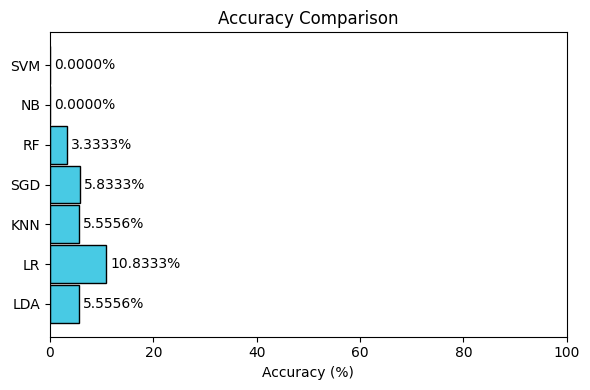

In [43]:
# Perform classification for the first person without dropping any labels
model_blackbox(X, y)

In [44]:
"""

# classifiers = [

#     LinearDiscriminantAnalysis(),

#     QuadraticDiscriminantAnalysis(reg_param=0.2),

#     LogisticRegression(multi_class="ovr"),

#     KNeighborsClassifier(n_neighbors=2),

#     SGDClassifier(),

#     RandomForestClassifier(n_estimators=100, random_state=42),

#     GaussianNB(),

#     SVC(),

# ]


# accuracy_results = []

# error_rate_results = []


# scaler = (
#     MinMaxScaler()
# )

# accuracy_results = []
# error_rate_results = []

# for classifier in classifiers:
#     accuracy, error_rate = train_and_evaluate_classifier(
#         classifier, X, y, scaler
#     )
#     accuracy_results.append(accuracy)
#     error_rate_results.append(error_rate)
#     print(
#         f"{classifier.__class__.__name__}:\t\t Accuracy - {accuracy * 100:.6f}%\t, Error Rate - {error_rate * 100:.6f}%"
#     )

# plot_results(classifiers, accuracy_results, error_rate_results)
"""

'\n\n# classifiers = [\n\n#     LinearDiscriminantAnalysis(),\n\n#     QuadraticDiscriminantAnalysis(reg_param=0.2),\n\n#     LogisticRegression(multi_class="ovr"),\n\n#     KNeighborsClassifier(n_neighbors=2),\n\n#     SGDClassifier(),\n\n#     RandomForestClassifier(n_estimators=100, random_state=42),\n\n#     GaussianNB(),\n\n#     SVC(),\n\n# ]\n\n\n# accuracy_results = []\n\n# error_rate_results = []\n\n\n# scaler = (\n#     MinMaxScaler()\n# )\n\n# accuracy_results = []\n# error_rate_results = []\n\n# for classifier in classifiers:\n#     accuracy, error_rate = train_and_evaluate_classifier(\n#         classifier, X, y, scaler\n#     )\n#     accuracy_results.append(accuracy)\n#     error_rate_results.append(error_rate)\n#     print(\n#         f"{classifier.__class__.__name__}:\t\t Accuracy - {accuracy * 100:.6f}%\t, Error Rate - {error_rate * 100:.6f}%"\n#     )\n\n# plot_results(classifiers, accuracy_results, error_rate_results)\n'

## Models based on the data with labels


#### grouping


Models Tried on the data

- Logistic regression
- KNN
- SVM
- LDA


### Reading Data


In [45]:
# read data from csv file
DF_data_firstPerson = pd.read_csv("data_firstPerson_withoutY_withLabels_grouped.csv")

In [46]:
# Y_arr = []
# resultData = mat_data["info"][0]
# for i in range(0, len(resultData)):
#     Y_arr.append(resultData[i]["cond_number"][0])
# Y_arr = np.array(Y_arr)
# for i in Y_arr:
#     print(i, end=" ")

In [47]:
X = DF_data_firstPerson.drop(["Unnamed: 0"], axis=1)
# y = pd.DataFrame(Y_arr)
X

Amygdala_L  Amygdala_R  Angular_L  Angular_R  Calcarine_L  Calcarine_R  \
0     -0.012100    0.127622   0.317062   0.440933     0.982531     1.007493   
1      0.184056   -0.252383   0.495670   0.268853     0.541290     0.385210   
2     -0.026768    0.080071   0.282150   0.123677     0.316287     0.473524   
3      0.349658    0.278891  -0.038872   0.051120     0.468914     0.533926   
4      0.071451   -0.138541  -0.290449  -0.082056     0.861988     0.837882   
..          ...         ...        ...        ...          ...          ...   
355   -0.304918   -0.216347  -0.391553  -0.328098     0.760020     0.707223   
356   -0.604440   -0.640764  -0.290656  -0.194727     0.587302     0.777338   
357   -0.339885   -0.027879  -0.226727  -0.315013     0.485950     0.449820   
358   -0.087675    0.015724  -0.320493  -0.096281     0.305148     0.373391   
359   -0.583763   -0.325472   0.238563   0.222808     0.516925     0.623588   

     Caudate_L  Caudate_R  Cerebelum_10_L  Cerebelum_10_R  ...  Thalamus_L  \
0     0.527289   0.697380       -0.452706        0.112530  ...   -0.039782   
1     0.151791   0.061421       -0.137234       -0.151990  ...    0.044482   
2     0.191545   0.268181        0.215842       -0.007734  ...    0.229800   
3     0.302625   0.638368        0.128229       -0.021630  ...    0.160389   
4     0.260126   0.170274        0.251325        0.313872  ...    0.324789   
..         ...        ...             ...             ...  ...         ...   
355  -0.013529  -0.088941        0.072223       -0.223912  ...    0.017763   
356   0.063159   0.167635        0.098304        0.018715  ...   -0.173167   
357  -0.047313  -0.207899       -0.243778       -0.083369  ...    0.049297   
358   0.648025   0.656058        0.018138        0.073058  ...   -0.055691   
359  -0.111869  -0.047183        0.225140        0.019417  ...   -0.086967   

     Thalamus_R  Vermis_10  Vermis_1_2  Vermis_3  Vermis_4_5  Vermis_6  \
0      0.046021  -0.402737   -0.304329  0.108593    0.041929  0.218866   
1     -0.282987  -0.918588   -0.040708 -0.029827    0.101779  0.155766   
2      0.086662  -0.084191   -0.005997  0.025533   -0.004611  0.339622   
3     -0.017670  -0.656971   -0.307707  0.235982    0.038905  0.133213   
4      0.184883   0.290392    0.159835  0.244467    0.026842  0.410277   
..          ...        ...         ...       ...         ...       ...   
355   -0.026142  -0.034494   -0.155840 -0.143455    0.115667 -0.010817   
356   -0.049110   0.114216   -0.222488 -0.106257   -0.120006  0.073656   
357   -0.222177  -0.701982   -0.453526 -0.204876    0.111536  0.302387   
358   -0.190539  -0.058743    0.152624 -0.512153   -0.132577  0.211198   
359   -0.244091  -0.315857   -0.167636 -0.065290    0.107785  0.166520   

     Vermis_7  Vermis_8  Vermis_9  
0    0.192530 -0.166507 -0.141913  
1    0.424487  0.118813  0.009467  
2    0.349004  0.021322 -0.097248  
3    0.675041 -0.030475 -0.393777  
4    0.282093  0.330347  0.219398  
..        ...       ...       ...  
355  0.069590 -0.169807  0.428491  
356  0.133038 -0.247422  0.121031  
357  0.631713 -0.141436 -0.227079  
358  0.468037 -0.055674 -0.345644  
359  0.203149 -0.148328 -0.189036  

[360 rows x 117 columns]

In [48]:
y

0      42
1      11
2      40
3      41
4      19
       ..
355    17
356    13
357     2
358    48
359    56
Length: 360, dtype: uint8

In [49]:
dataToMap = pd.concat([X, y], axis=1)
# plotting the correlation between the features
plt.figure(figsize=(117, 117))
sns.heatmap(dataToMap.corr(), annot=True)
plt.show()

### Making models on the grouped data


LinearDiscriminantAnalysis:		 Accuracy - 5.555556%	, Error Rate - 94.444444%
LogisticRegression:		 Accuracy - 3.611111%	, Error Rate - 96.388889%
KNeighborsClassifier:		 Accuracy - 3.333333%	, Error Rate - 96.666667%
SGDClassifier:		 Accuracy - 5.000000%	, Error Rate - 95.000000%
RandomForestClassifier:		 Accuracy - 3.888889%	, Error Rate - 96.111111%
GaussianNB:		 Accuracy - 1.944444%	, Error Rate - 98.055556%
SVC:		 Accuracy - 0.277778%	, Error Rate - 99.722222%


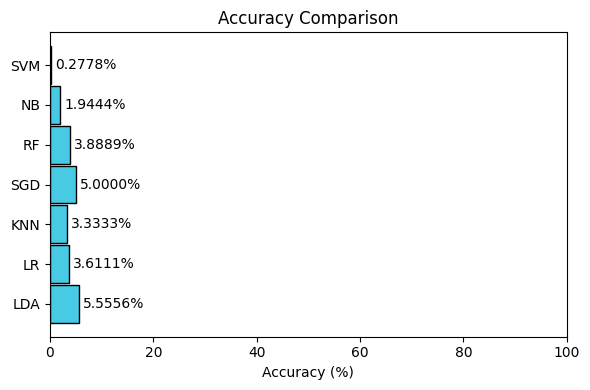

In [50]:
model_blackbox(X, y)

## Now we are going to try feature selection to improve accuracy using LR


In [51]:
def calculate_feature_importance(X, y):
    y = column_or_1d(y, warn=True)
    model = LogisticRegression().fit(X, y)
    importance = dict(zip(X.columns, abs(model.coef_[0])))
    return importance

In [52]:
def plot_features_by_importance(
    most_important_features,
    other_features,
    most_important_importances,
    other_importances,
):
    # Concatenate the most important importances and other importances
    all_importances = np.concatenate((most_important_importances, other_importances))

    # Plot the importance values
    plt.figure(figsize=(20, 20))
    plt.barh(
        most_important_features, most_important_importances, color="#00A86B"
    )  # Color the top f elements green

    plt.barh(
        other_features, other_importances, color="#318CE7"
    )  # Color the remaining elements blue

    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.title("Feature Importance")

    # Add labels to the bars
    for i, v in enumerate(all_importances):
        plt.text(v, i, str(round(v, 5)), color="black", va="center")
    plt.show()

In [53]:
def plot_feature_importance(importance, f):
    # Extract the feature names and importance values
    feature_names = list(importance.keys())
    importance_values = list(importance.values())

    # Sort the feature names and importance values in descending order
    sorted_indices = sorted(
        range(len(importance_values)), key=lambda k: importance_values[k], reverse=True
    )
    sorted_feature_names = [feature_names[i] for i in sorted_indices]
    sorted_importance_values = [importance_values[i] for i in sorted_indices]

    most_important_features = sorted_feature_names[:f]
    most_important_importances = sorted_importance_values[:f]

    other_features = sorted_feature_names[f:]
    other_importances = sorted_importance_values[f:]

    plot_features_by_importance(
        most_important_features,
        other_features,
        most_important_importances,
        other_importances,
    )

    return other_features

In [54]:
X = pd.read_csv("data_firstPerson_withoutY_withLabels_grouped.csv").drop(
    ["Unnamed: 0"], axis=1
)
# y = pd.DataFrame(Y_arr)
X

Amygdala_L  Amygdala_R  Angular_L  Angular_R  Calcarine_L  Calcarine_R  \
0     -0.012100    0.127622   0.317062   0.440933     0.982531     1.007493   
1      0.184056   -0.252383   0.495670   0.268853     0.541290     0.385210   
2     -0.026768    0.080071   0.282150   0.123677     0.316287     0.473524   
3      0.349658    0.278891  -0.038872   0.051120     0.468914     0.533926   
4      0.071451   -0.138541  -0.290449  -0.082056     0.861988     0.837882   
..          ...         ...        ...        ...          ...          ...   
355   -0.304918   -0.216347  -0.391553  -0.328098     0.760020     0.707223   
356   -0.604440   -0.640764  -0.290656  -0.194727     0.587302     0.777338   
357   -0.339885   -0.027879  -0.226727  -0.315013     0.485950     0.449820   
358   -0.087675    0.015724  -0.320493  -0.096281     0.305148     0.373391   
359   -0.583763   -0.325472   0.238563   0.222808     0.516925     0.623588   

     Caudate_L  Caudate_R  Cerebelum_10_L  Cerebelum_10_R  ...  Thalamus_L  \
0     0.527289   0.697380       -0.452706        0.112530  ...   -0.039782   
1     0.151791   0.061421       -0.137234       -0.151990  ...    0.044482   
2     0.191545   0.268181        0.215842       -0.007734  ...    0.229800   
3     0.302625   0.638368        0.128229       -0.021630  ...    0.160389   
4     0.260126   0.170274        0.251325        0.313872  ...    0.324789   
..         ...        ...             ...             ...  ...         ...   
355  -0.013529  -0.088941        0.072223       -0.223912  ...    0.017763   
356   0.063159   0.167635        0.098304        0.018715  ...   -0.173167   
357  -0.047313  -0.207899       -0.243778       -0.083369  ...    0.049297   
358   0.648025   0.656058        0.018138        0.073058  ...   -0.055691   
359  -0.111869  -0.047183        0.225140        0.019417  ...   -0.086967   

     Thalamus_R  Vermis_10  Vermis_1_2  Vermis_3  Vermis_4_5  Vermis_6  \
0      0.046021  -0.402737   -0.304329  0.108593    0.041929  0.218866   
1     -0.282987  -0.918588   -0.040708 -0.029827    0.101779  0.155766   
2      0.086662  -0.084191   -0.005997  0.025533   -0.004611  0.339622   
3     -0.017670  -0.656971   -0.307707  0.235982    0.038905  0.133213   
4      0.184883   0.290392    0.159835  0.244467    0.026842  0.410277   
..          ...        ...         ...       ...         ...       ...   
355   -0.026142  -0.034494   -0.155840 -0.143455    0.115667 -0.010817   
356   -0.049110   0.114216   -0.222488 -0.106257   -0.120006  0.073656   
357   -0.222177  -0.701982   -0.453526 -0.204876    0.111536  0.302387   
358   -0.190539  -0.058743    0.152624 -0.512153   -0.132577  0.211198   
359   -0.244091  -0.315857   -0.167636 -0.065290    0.107785  0.166520   

     Vermis_7  Vermis_8  Vermis_9  
0    0.192530 -0.166507 -0.141913  
1    0.424487  0.118813  0.009467  
2    0.349004  0.021322 -0.097248  
3    0.675041 -0.030475 -0.393777  
4    0.282093  0.330347  0.219398  
..        ...       ...       ...  
355  0.069590 -0.169807  0.428491  
356  0.133038 -0.247422  0.121031  
357  0.631713 -0.141436 -0.227079  
358  0.468037 -0.055674 -0.345644  
359  0.203149 -0.148328 -0.189036  

[360 rows x 117 columns]

In [55]:
importantLabels = calculate_feature_importance(X, y)
importantLabels.keys()

dict_keys(['Amygdala_L', 'Amygdala_R', 'Angular_L', 'Angular_R', 'Calcarine_L', 'Calcarine_R', 'Caudate_L', 'Caudate_R', 'Cerebelum_10_L', 'Cerebelum_10_R', 'Cerebelum_3_L', 'Cerebelum_3_R', 'Cerebelum_4_5_L', 'Cerebelum_4_5_R', 'Cerebelum_6_L', 'Cerebelum_6_R', 'Cerebelum_7b_L', 'Cerebelum_7b_R', 'Cerebelum_8_L', 'Cerebelum_8_R', 'Cerebelum_9_L', 'Cerebelum_9_R', 'Cerebelum_Crus1_L', 'Cerebelum_Crus1_R', 'Cerebelum_Crus2_L', 'Cerebelum_Crus2_R', 'Cingulum_Ant_L', 'Cingulum_Ant_R', 'Cingulum_Mid_L', 'Cingulum_Mid_R', 'Cingulum_Post_L', 'Cingulum_Post_R', 'Cuneus_L', 'Cuneus_R', 'Frontal_Inf_Oper_L', 'Frontal_Inf_Oper_R', 'Frontal_Inf_Orb_L', 'Frontal_Inf_Orb_R', 'Frontal_Inf_Tri_L', 'Frontal_Inf_Tri_R', 'Frontal_Med_Orb_L', 'Frontal_Med_Orb_R', 'Frontal_Mid_L', 'Frontal_Mid_Orb_L', 'Frontal_Mid_Orb_R', 'Frontal_Mid_R', 'Frontal_Sup_L', 'Frontal_Sup_Medial_L', 'Frontal_Sup_Medial_R', 'Frontal_Sup_Orb_L', 'Frontal_Sup_Orb_R', 'Frontal_Sup_R', 'Fusiform_L', 'Fusiform_R', 'Heschl_L', 'Hesc

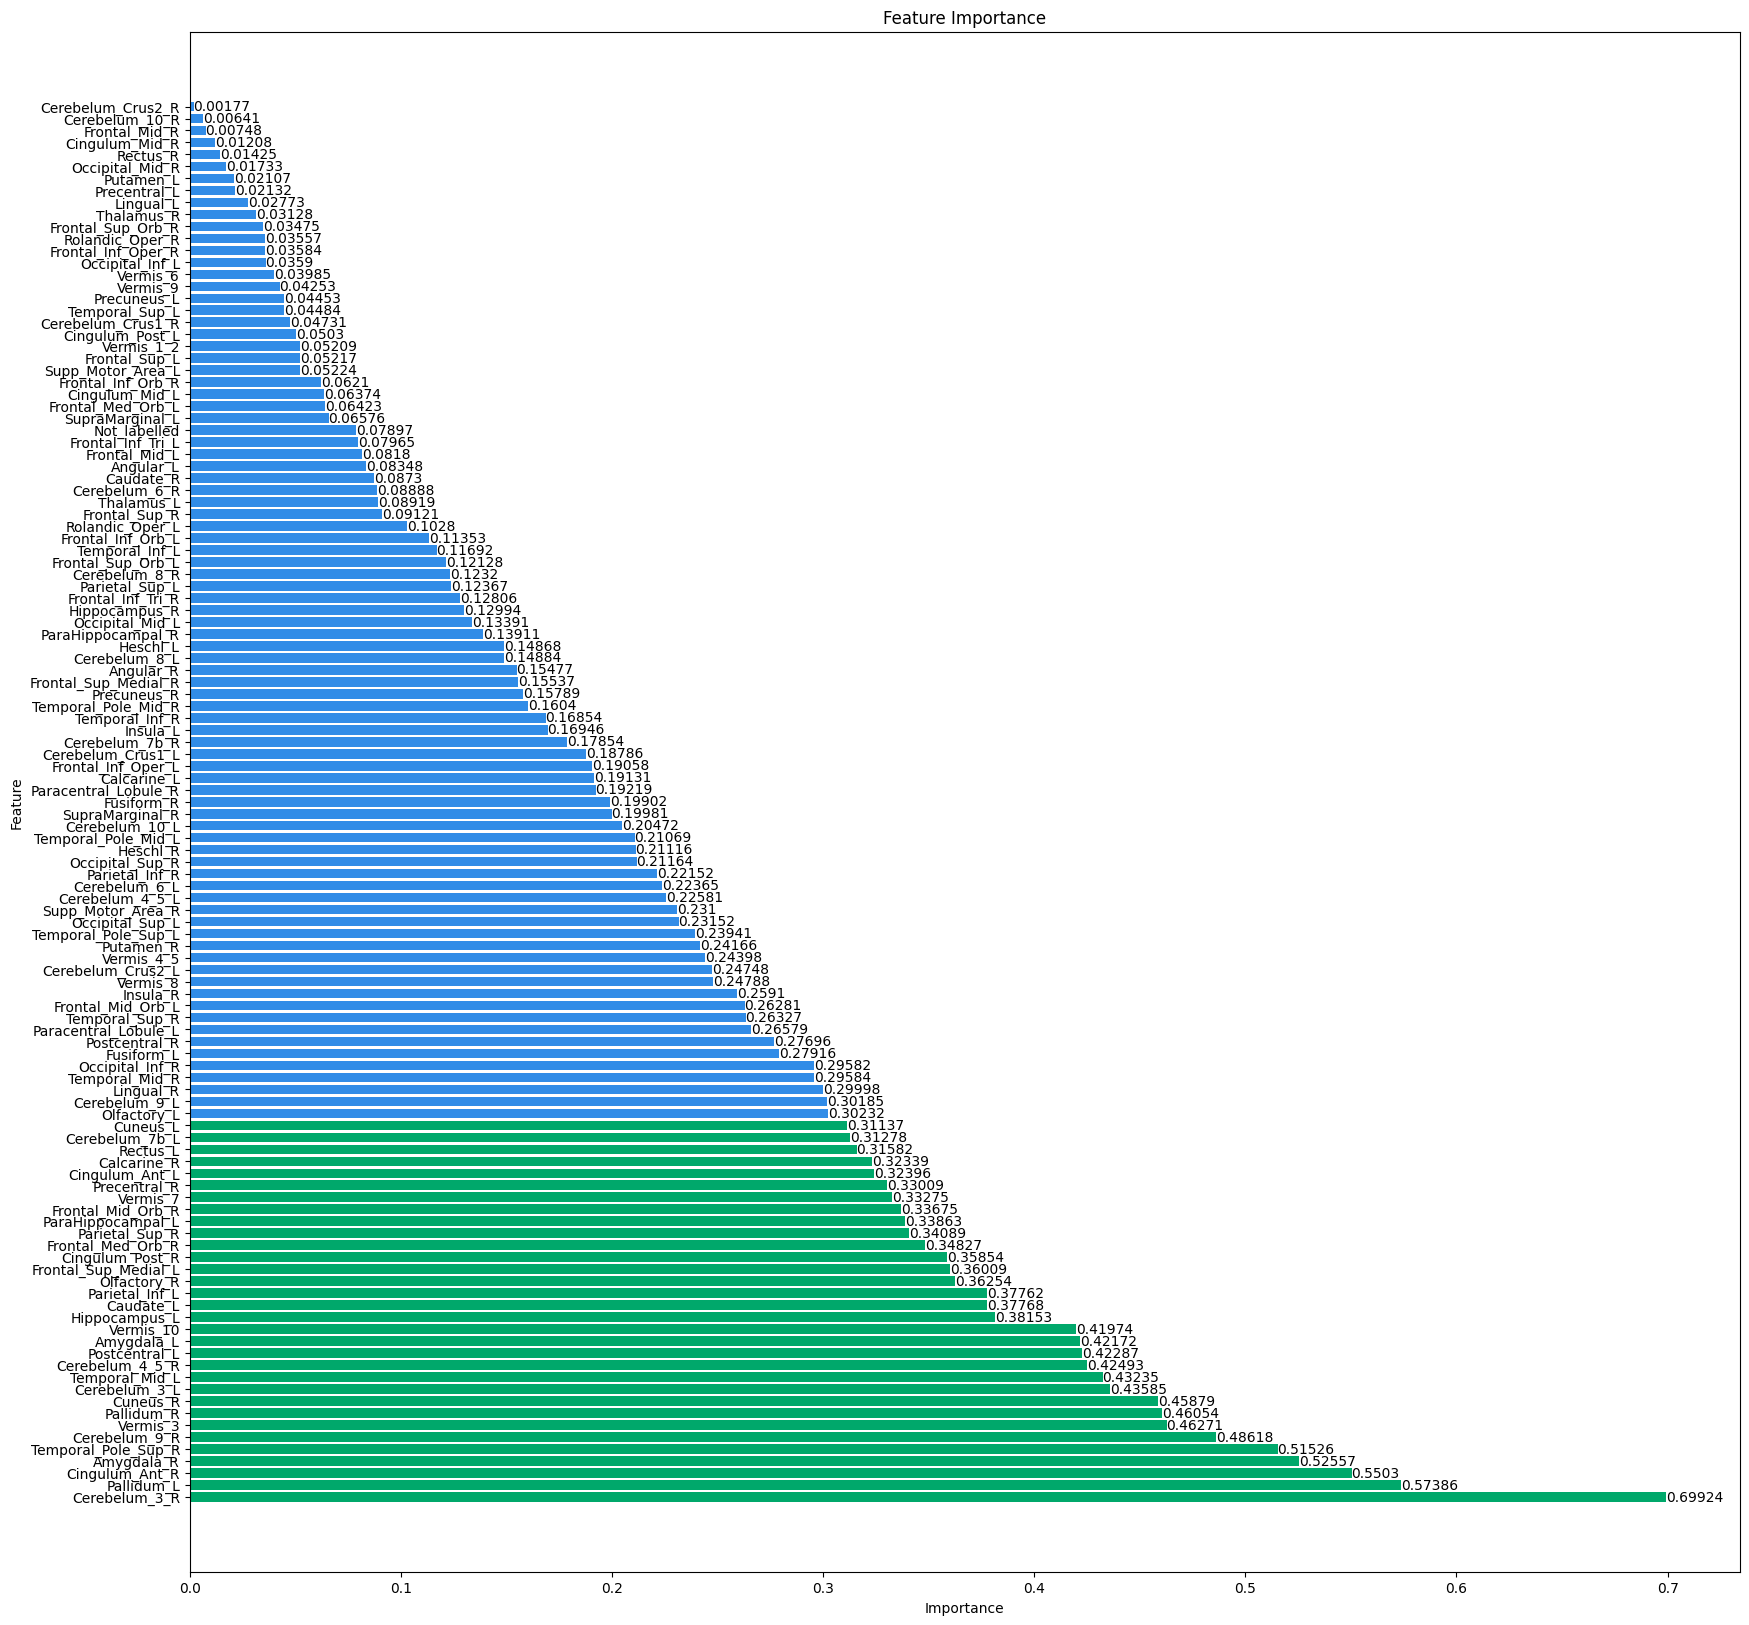

85


In [56]:
labelsToDrop = plot_feature_importance(importantLabels, 32)
print(len(labelsToDrop))

Now we got the labels to drop from the grouped data


In [57]:
Xr = pd.read_csv("data_firstPerson_withoutY_withLabels_ungrouped.csv")
# yr = pd.DataFrame(Y_arr)
Xr

C:\Users\punya\AppData\Local\Temp\ipykernel_17128\4056761357.py:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,

0                    1                    2  \
0              -0.026807             0.684834             0.913259   
1               0.918387             1.044505             0.775008   
2               0.404463             0.491515             0.322737   
3               0.154143             0.090534             0.126065   
4               0.022657             0.066583             0.062565   
..                   ...                  ...                  ...   
356  -0.4373662525189118  -0.1991723989399849  -0.0218075376762492   
357  -0.8057856443676847  -0.8038618373233878  -0.5685783488432488   
358   0.6403108443360892   0.5763693852797093   0.5077701712534197   
359   0.5359184140926044    0.835076121302719   0.4640954198767041   
360         Not_labelled    Cerebelum_Crus2_L    Cerebelum_Crus2_L   

                       3                   4                    5  \
0              -0.607473           -0.035652             0.831592   
1               0.446292            0.573288             0.296588   
2               0.565998            0.910144            -0.022672   
3               0.851853            0.928996             0.568791   
4              -0.176771           -0.507001             0.426824   
..                   ...                 ...                  ...   
356  -0.1004413919183942  -0.047161379754127   0.5147792986138713   
357  -0.0095572521640705  0.0610274682859937   -0.602578355095182   
358   0.7850156673204238  1.1649651391290887   0.1523300577644411   
359  -0.2631989528021878  0.3445672945260684  -0.2216912720772245   
360    Cerebelum_Crus2_L   Cerebelum_Crus2_L         Not_labelled   

                       6                    7                    8  \
0               0.036146             0.103328             0.409886   
1               0.279037             0.688394             0.594526   
2              -0.265589            -0.320328             -0.14411   
3               0.043317             0.174323              0.66036   
4              -0.443048            -0.417312             0.199288   
..                   ...                  ...                  ...   
356  -0.9558290250717943  -0.4141399321583588   0.1444875507337994   
357  -0.3338055683591824  -0.5461927539759739   -1.111860315247731   
358   0.6520129017311865   0.2364065693360304  -0.0287675390258458   
359  -0.6180908099626049  -0.1764635065090805   0.3610879328005041   
360         Not_labelled         Not_labelled    Cerebelum_Crus2_L   

                       9  ...                21754                21755  \
0               0.377686  ...            -1.659966             0.492116   
1               0.285484  ...            -2.874887             -1.26714   
2               0.282993  ...            -0.531833            -1.218505   
3               0.907186  ...              0.63476             0.154217   
4               0.620498  ...             0.642981              1.75229   
..                   ...  ...                  ...                  ...   
356   0.3808020332408703  ...  -0.7591273023188021  -1.7834788608558192   
357  -1.2896830865054774  ...   1.3236631371092604   2.4288606498277963   
358   0.0652552268190856  ...    0.412991835213757  -0.3052184755401814   
359    0.613484765379672  ...  -0.2815759025962687  -0.9580568797598517   
360    Cerebelum_Crus2_L  ...         Not_labelled         Not_labelled   

                   21756                21757                21758  \
0               2.379579             -0.37385            -1.888726   
1              -0.787237            -1.540824             -1.14562   
2              -0.607947            -0.549644             -0.06679   
3                1.00708            -0.464818             -0.35252   
4               0.554075             2.382414             0.980933   
..                   ...                  ...                  ...   
356  -0.2725317512942622  -0.1947644095685813  -0.3357853506861347   
357   1.4514453240824527    1.555452189946681   0.2

In [58]:
# Get the labels from the 360th row
labels = DF_withoutLabels.iloc[360]
# Get the column numbers of labels that match any label in labelsToDrop
column_numbers = [i for i, label in enumerate(labels) if label in labelsToDrop]
print(len(column_numbers))
print(column_numbers)

17526
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 192, 193, 194, 195, 196, 197, 198, 199, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 241, 242, 243, 244, 245, 252, 253, 254, 25

In [59]:
# Drop the columns from the dataframe with column numbers in column_numbers
Xr = Xr.drop(Xr.columns[column_numbers], axis=1)
# Drop the 360th row
Xr = Xr.drop([360])
Xr

22                   23                   24  \
0                1.07257             0.429824              0.37179   
1               0.431117             0.012365             0.133352   
2              -0.067482              0.18649             -0.58625   
3               0.881548             0.707605             0.351008   
4               0.427401            -0.126467            -0.321641   
..                   ...                  ...                  ...   
355   0.2707236159787329  -0.1233156269465928  -0.4911989807205887   
356   0.5985328312872148  -0.5722501600016545  -0.2578339744313189   
357  -0.0761010550953233   0.2424774789923063  -0.2207487970417029   
358   0.5924000505739049   0.9210631009410732   0.0334631341421215   
359   0.3523807763553464  -0.1432377081078526  -0.3348641703711498   

                      25                   44                   45  \
0               0.121874             0.740384             0.472849   
1              -0.090106             0.633604            -0.471045   
2              -0.902031            -0.139708             0.400069   
3               0.559679             1.126703             1.106826   
4               0.247957              0.44618             0.347693   
..                   ...                  ...                  ...   
355  -0.5933782651362027   0.1066455776596889  -0.0621487201179584   
356   -0.042970479992897   0.2134043270754455  -0.2287318499508813   
357  -0.9636185659817106  -0.0037477093597954   0.1366056783126353   
358   -0.504074637633435   0.5777726281038477    0.747972904531822   
359  -0.0200010074980907   0.8613021733703938   0.7242697418301431   

                      46                   47                   48  \
0               0.136216            -0.245685              0.00519   
1              -0.479401            -0.912199            -0.329495   
2              -0.010147            -0.237381             0.430801   
3               0.243832            -0.217009             -0.34979   
4               0.341984             0.871795             1.061959   
..                   ...                  ...                  ...   
355  -0.9251574497953764  -0.7040863890471812   -0.382719414191068   
356  -0.2621904395148438   0.0628563333923412  -0.0708105684141569   
357  -0.5255573368306802  -0.5701951980241093  -0.4855179867954316   
358    0.698956666483143   0.9573801842003824   0.9670311731272004   
359   0.5812590169641413    0.262946312250668    0.223539732302376   

                      73  ...                21567                21568  \
0               0.278981  ...            -0.192336            -0.451272   
1               0.892582  ...            -0.887347            -0.164499   
2               1.538809  ...             -0.68489            -0.577944   
3              -0.002652  ...             0.185179             0.389814   
4               0.109257  ...             0.335626            -0.113413   
..                   ...  ...                  ...                  ...   
355  -1.0338270754547063  ...  -0.0283937272576725    0.439208573369521   
356   -0.573686302034073  ...  -0.0745752640969679  -0.0788331391474824   
357  -0.4021463237421392  ...   0.0348896694606647   0.2215824865071635   
358   0.7833937634516172  ...  -0.3294862073936683  -0.3150195081742823   
359   -0.230546433360883  ...  -0.8781655778467914  -0.3102399619646976   

                   21569                21584                21585  \
0              -0.107936             0.492168            -0.439485   
1              -0.096227             -0.52071            -0.622878   
2              -0.085045             0.238719            -0.387427   
3              -0.332117            -0.079461             0.007697   
4               0.039142            -0.775708            -0.813126   
..                   ...                  ...                  ...   
355   0.3466924186207023  -0.0852969721959789  -0.5745966444348701   
356   0.2900068678281997   0.313865226

In [60]:
Xr.describe().transpose()

count  unique       top  freq
22     360.0   360.0  1.072570   1.0
23     360.0   360.0  0.429824   1.0
24     360.0   360.0  0.371790   1.0
25     360.0   360.0  0.121874   1.0
44     360.0   360.0  0.740384   1.0
...      ...     ...       ...   ...
21586  360.0   360.0 -1.160816   1.0
21587  360.0   360.0 -0.772168   1.0
21728  360.0   360.0 -1.823271   1.0
21729  360.0   360.0 -1.052733   1.0
21730  360.0   360.0 -0.261540   1.0

[4238 rows x 4 columns]

LinearDiscriminantAnalysis:		 Accuracy - 5.277778%	, Error Rate - 94.722222%
LogisticRegression:		 Accuracy - 6.111111%	, Error Rate - 93.888889%
KNeighborsClassifier:		 Accuracy - 4.166667%	, Error Rate - 95.833333%
SGDClassifier:		 Accuracy - 5.555556%	, Error Rate - 94.444444%
RandomForestClassifier:		 Accuracy - 4.722222%	, Error Rate - 95.277778%
GaussianNB:		 Accuracy - 0.000000%	, Error Rate - 100.000000%
SVC:		 Accuracy - 0.000000%	, Error Rate - 100.000000%


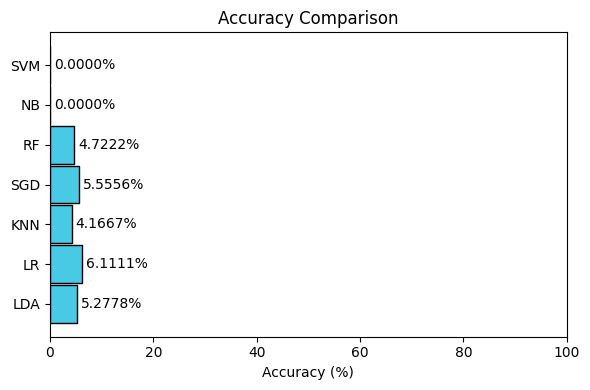

In [62]:
# Perform classification for the first person after dropping the least important labels
model_blackbox(Xr, y)

## Now we are going to try feature selection to improve accuracy by taking the labels which have high activation values


In [ ]:
data_withLabels_grouped = pd.read_csv(
    "data_firstPerson_withoutY_withLabels_grouped.csv"
)
data_withLabels_grouped.drop(["Unnamed: 0"], axis=1, inplace=True)
data_withLabels_grouped

Amygdala_L  Amygdala_R  Angular_L  Angular_R  Calcarine_L  Calcarine_R  \
0     -0.012100    0.127622   0.317062   0.440933     0.982531     1.007493   
1      0.184056   -0.252383   0.495670   0.268853     0.541290     0.385210   
2     -0.026768    0.080071   0.282150   0.123677     0.316287     0.473524   
3      0.349658    0.278891  -0.038872   0.051120     0.468914     0.533926   
4      0.071451   -0.138541  -0.290449  -0.082056     0.861988     0.837882   
..          ...         ...        ...        ...          ...          ...   
355   -0.304918   -0.216347  -0.391553  -0.328098     0.760020     0.707223   
356   -0.604440   -0.640764  -0.290656  -0.194727     0.587302     0.777338   
357   -0.339885   -0.027879  -0.226727  -0.315013     0.485950     0.449820   
358   -0.087675    0.015724  -0.320493  -0.096281     0.305148     0.373391   
359   -0.583763   -0.325472   0.238563   0.222808     0.516925     0.623588   

     Caudate_L  Caudate_R  Cerebelum_10_L  Cerebelum_10_R  ...  Thalamus_L  \
0     0.527289   0.697380       -0.452706        0.112530  ...   -0.039782   
1     0.151791   0.061421       -0.137234       -0.151990  ...    0.044482   
2     0.191545   0.268181        0.215842       -0.007734  ...    0.229800   
3     0.302625   0.638368        0.128229       -0.021630  ...    0.160389   
4     0.260126   0.170274        0.251325        0.313872  ...    0.324789   
..         ...        ...             ...             ...  ...         ...   
355  -0.013529  -0.088941        0.072223       -0.223912  ...    0.017763   
356   0.063159   0.167635        0.098304        0.018715  ...   -0.173167   
357  -0.047313  -0.207899       -0.243778       -0.083369  ...    0.049297   
358   0.648025   0.656058        0.018138        0.073058  ...   -0.055691   
359  -0.111869  -0.047183        0.225140        0.019417  ...   -0.086967   

     Thalamus_R  Vermis_10  Vermis_1_2  Vermis_3  Vermis_4_5  Vermis_6  \
0      0.046021  -0.402737   -0.304329  0.108593    0.041929  0.218866   
1     -0.282987  -0.918588   -0.040708 -0.029827    0.101779  0.155766   
2      0.086662  -0.084191   -0.005997  0.025533   -0.004611  0.339622   
3     -0.017670  -0.656971   -0.307707  0.235982    0.038905  0.133213   
4      0.184883   0.290392    0.159835  0.244467    0.026842  0.410277   
..          ...        ...         ...       ...         ...       ...   
355   -0.026142  -0.034494   -0.155840 -0.143455    0.115667 -0.010817   
356   -0.049110   0.114216   -0.222488 -0.106257   -0.120006  0.073656   
357   -0.222177  -0.701982   -0.453526 -0.204876    0.111536  0.302387   
358   -0.190539  -0.058743    0.152624 -0.512153   -0.132577  0.211198   
359   -0.244091  -0.315857   -0.167636 -0.065290    0.107785  0.166520   

     Vermis_7  Vermis_8  Vermis_9  
0    0.192530 -0.166507 -0.141913  
1    0.424487  0.118813  0.009467  
2    0.349004  0.021322 -0.097248  
3    0.675041 -0.030475 -0.393777  
4    0.282093  0.330347  0.219398  
..        ...       ...       ...  
355  0.069590 -0.169807  0.428491  
356  0.133038 -0.247422  0.121031  
357  0.631713 -0.141436 -0.227079  
358  0.468037 -0.055674 -0.345644  
359  0.203149 -0.148328 -0.189036  

[360 rows x 117 columns]

In [ ]:
# Get the sum of each column in the dataset and make a dictionary out of it
sums = data_withLabels_grouped.sum(axis=0)
sums = sums.to_dict()
print(sums)
# sort the dict based on the values in ascending order
sorted_sums = sorted(sums.items(), key=lambda x: x[1])
print(sorted_sums)
len(sorted_sums)

{'Amygdala_L': -77.61152875915951, 'Amygdala_R': -51.758864465784924, 'Angular_L': -16.25037350449205, 'Angular_R': 11.33437451461237, 'Calcarine_L': 174.9549677470983, 'Calcarine_R': 159.9974230827974, 'Caudate_L': 31.475863109539468, 'Caudate_R': 37.590607558221336, 'Cerebelum_10_L': -15.51571342333094, 'Cerebelum_10_R': -14.481956296617643, 'Cerebelum_3_L': 16.157560673243033, 'Cerebelum_3_R': -32.42744517986903, 'Cerebelum_4_5_L': 61.06766411019527, 'Cerebelum_4_5_R': 10.52656052267078, 'Cerebelum_6_L': 128.7320040841298, 'Cerebelum_6_R': 80.20739695675456, 'Cerebelum_7b_L': 3.915163738352478, 'Cerebelum_7b_R': 32.96684741261445, 'Cerebelum_8_L': -12.546331022952671, 'Cerebelum_8_R': 6.186467584435173, 'Cerebelum_9_L': -13.84438120173298, 'Cerebelum_9_R': -2.2870086533658385, 'Cerebelum_Crus1_L': 69.12564003365392, 'Cerebelum_Crus1_R': 56.94216681796687, 'Cerebelum_Crus2_L': -21.60356470501675, 'Cerebelum_Crus2_R': 14.705562247897026, 'Cingulum_Ant_L': -69.0252620023075, 'Cingulum_

117

In [ ]:
# get the first 85 labels from the sorted sums
labels_to_drop = [label for label, _ in sorted_sums[:85]]
print(labels_to_drop)


# Get the labels from the 360th row
labels = DF_withoutLabels.iloc[360]
# Get the column numbers of labels that match any label in labels_to_drop
column_numbers = [i for i, label in enumerate(labels) if label in labels_to_drop]

['Cingulum_Ant_R', 'Amygdala_L', 'Frontal_Med_Orb_R', 'Cingulum_Ant_L', 'Frontal_Sup_Medial_R', 'Frontal_Sup_Medial_L', 'Amygdala_R', 'Vermis_3', 'Paracentral_Lobule_R', 'SupraMarginal_R', 'Vermis_1_2', 'Vermis_10', 'Temporal_Pole_Mid_L', 'Heschl_L', 'Temporal_Pole_Sup_L', 'Cerebelum_3_R', 'SupraMarginal_L', 'Putamen_R', 'ParaHippocampal_L', 'Heschl_R', 'Temporal_Pole_Mid_R', 'Cingulum_Mid_R', 'Cingulum_Mid_L', 'Pallidum_L', 'Cerebelum_Crus2_L', 'Insula_R', 'Vermis_8', 'Putamen_L', 'Angular_L', 'Cerebelum_10_L', 'ParaHippocampal_R', 'Cingulum_Post_R', 'Cerebelum_10_R', 'Rolandic_Oper_R', 'Cerebelum_9_L', 'Thalamus_R', 'Cerebelum_8_L', 'Postcentral_R', 'Paracentral_Lobule_L', 'Vermis_9', 'Frontal_Sup_R', 'Hippocampus_L', 'Insula_L', 'Precuneus_R', 'Temporal_Sup_L', 'Hippocampus_R', 'Cerebelum_9_R', 'Frontal_Sup_L', 'Temporal_Pole_Sup_R', 'Temporal_Sup_R', 'Pallidum_R', 'Rectus_L', 'Cerebelum_7b_L', 'Thalamus_L', 'Frontal_Sup_Orb_R', 'Cerebelum_8_R', 'Precuneus_L', 'Frontal_Sup_Orb_L', '

In [ ]:
Xr = pd.read_csv("data_firstPerson_withoutY_withLabels_ungrouped.csv")

Xr = Xr.drop(Xr.columns[column_numbers], axis=1)
# Drop the 360th row
Xr = Xr.drop([360])

Xr.to_csv("data_firstPerson_withoutY_grouped_selectdFeatures_highAcc.csv", index=False)
yr = y
# yr = pd.DataFrame(Y_arr)
Xr

C:\Users\punya\AppData\Local\Temp\ipykernel_31924\1525722201.py:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,

453                  486                  501  \
0               0.672782             0.133635             0.623779   
1               0.401119             0.560182            -0.027878   
2              -0.354645             0.358526             0.012226   
3               0.179454             0.504696             0.009575   
4               0.311131             0.304937             0.206168   
..                   ...                  ...                  ...   
355  -0.0613930673762507  -0.2410226372997816  -0.3008094780220633   
356   0.3450009197671256   0.6427975937692253  -0.2189074412329235   
357   0.4229518876346691   0.5027382145836252  -0.0504331395049767   
358   0.1825192131546136   0.6037740274625102   0.3156644106810217   
359  -0.3916132028358573  -0.3051754529807657   0.0636074758955522   

                     502                  510                  515  \
0               0.817069             1.419258             0.445588   
1              -0.308128             0.482968            -0.151225   
2               0.196239             0.601522             0.374716   
3              -0.094083              0.32525            -0.253876   
4               0.476592             0.768984             0.865699   
..                   ...                  ...                  ...   
355  -0.1809732943322487  -0.8197296611655944   0.2901510688475694   
356  -0.2238778264881297     0.66322728835443  -0.3296544154035893   
357  -0.2464136077556508   0.0008204048327477   0.3956613275420249   
358   0.5199488218146484   1.0835127448567186  -0.2961159987073533   
359  -0.2083206784460477   0.6923587817366359   0.4396249632058764   

                     516                  517                  536  \
0                 0.4939            -0.092603             0.530495   
1               0.419782             0.634133            -0.155327   
2               0.211351            -0.350837             0.411863   
3               0.397236             0.708566             0.010592   
4               0.721139             0.303873            -0.230724   
..                   ...                  ...                  ...   
355   0.4425387474340803    0.104990059069745   -0.402065778229443   
356     0.11018537772152   0.6375828662321754  -0.3528537137895303   
357   0.1132955411045291  -0.3300621988969453  -0.7742019652117202   
358  -0.2483146388563783   0.4369093662251651    0.401350018766052   
359    0.276994651645541   0.0571258374401935   0.1622132066912501   

                    543  ...               21702                21703  \
0              0.210872  ...            4.857267            -0.887208   
1              1.040663  ...            3.632748            -2.144534   
2              0.267121  ...             1.57589            -0.420758   
3              0.663366  ...            2.810443            -0.602802   
4             -0.793328  ...            2.597156             1.112858   
..                  ...  ...                 ...                  ...   
355  -1.208136587767065  ...  0.3702331824902276   0.4942431385593339   
356  -1.885441618619116  ...  0.0961761565104655   0.3408397554623589   
357  0.1004035274601176  ...  0.4957415352758796   0.3630841805426412   
358  0.0622371473089446  ...  1.1864198026420758   0.2244256935734895   
359  0.3750567212795305  ...   2.476654410218305  -0.1094796911810974   

                  21704               21705               21716  \
0              0.743327            1.562094             5.79176   
1              0.492774            0.725379            4.626482   
2              0.900177            0.567524            2.154687   
3              0.745401            0.707268             4.61295   
4              1.085341            1.384608            5.073999   
..                  ...                 ...                 ...   
355  0.2607185219473167   1.273625838965502   4.415135648142265   
356  1.1156861752351943  1.5808162850654897    2.68857435554077   
357  0.21087425427

In [ ]:
np.unique(yr)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59], dtype=uint8)

LinearDiscriminantAnalysis:		 Accuracy - 15.555556%	, Error Rate - 84.444444%
LogisticRegression:		 Accuracy - 18.888889%	, Error Rate - 81.111111%
KNeighborsClassifier:		 Accuracy - 9.166667%	, Error Rate - 90.833333%
SGDClassifier:		 Accuracy - 8.888889%	, Error Rate - 91.111111%
RandomForestClassifier:		 Accuracy - 4.166667%	, Error Rate - 95.833333%
GaussianNB:		 Accuracy - 0.833333%	, Error Rate - 99.166667%
SVC:		 Accuracy - 0.000000%	, Error Rate - 100.000000%


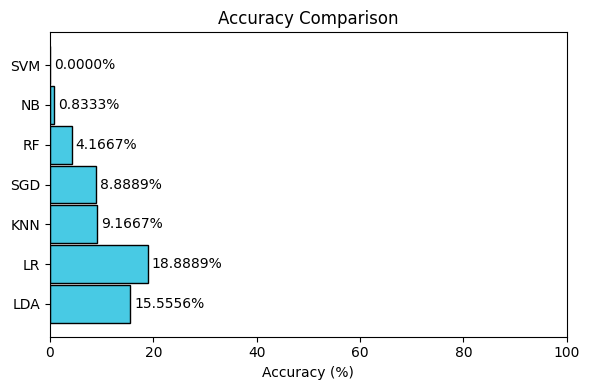

In [ ]:
# Perform classification for the first person after dropping the least important labels on the basis of high activation values
model_blackbox(Xr, yr)

In [ ]:
Xr

453                  486                  501  \
0               0.672782             0.133635             0.623779   
1               0.401119             0.560182            -0.027878   
2              -0.354645             0.358526             0.012226   
3               0.179454             0.504696             0.009575   
4               0.311131             0.304937             0.206168   
..                   ...                  ...                  ...   
355  -0.0613930673762507  -0.2410226372997816  -0.3008094780220633   
356   0.3450009197671256   0.6427975937692253  -0.2189074412329235   
357   0.4229518876346691   0.5027382145836252  -0.0504331395049767   
358   0.1825192131546136   0.6037740274625102   0.3156644106810217   
359  -0.3916132028358573  -0.3051754529807657   0.0636074758955522   

                     502                  510                  515  \
0               0.817069             1.419258             0.445588   
1              -0.308128             0.482968            -0.151225   
2               0.196239             0.601522             0.374716   
3              -0.094083              0.32525            -0.253876   
4               0.476592             0.768984             0.865699   
..                   ...                  ...                  ...   
355  -0.1809732943322487  -0.8197296611655944   0.2901510688475694   
356  -0.2238778264881297     0.66322728835443  -0.3296544154035893   
357  -0.2464136077556508   0.0008204048327477   0.3956613275420249   
358   0.5199488218146484   1.0835127448567186  -0.2961159987073533   
359  -0.2083206784460477   0.6923587817366359   0.4396249632058764   

                     516                  517                  536  \
0                 0.4939            -0.092603             0.530495   
1               0.419782             0.634133            -0.155327   
2               0.211351            -0.350837             0.411863   
3               0.397236             0.708566             0.010592   
4               0.721139             0.303873            -0.230724   
..                   ...                  ...                  ...   
355   0.4425387474340803    0.104990059069745   -0.402065778229443   
356     0.11018537772152   0.6375828662321754  -0.3528537137895303   
357   0.1132955411045291  -0.3300621988969453  -0.7742019652117202   
358  -0.2483146388563783   0.4369093662251651    0.401350018766052   
359    0.276994651645541   0.0571258374401935   0.1622132066912501   

                    543  ...               21702                21703  \
0              0.210872  ...            4.857267            -0.887208   
1              1.040663  ...            3.632748            -2.144534   
2              0.267121  ...             1.57589            -0.420758   
3              0.663366  ...            2.810443            -0.602802   
4             -0.793328  ...            2.597156             1.112858   
..                  ...  ...                 ...                  ...   
355  -1.208136587767065  ...  0.3702331824902276   0.4942431385593339   
356  -1.885441618619116  ...  0.0961761565104655   0.3408397554623589   
357  0.1004035274601176  ...  0.4957415352758796   0.3630841805426412   
358  0.0622371473089446  ...  1.1864198026420758   0.2244256935734895   
359  0.3750567212795305  ...   2.476654410218305  -0.1094796911810974   

                  21704               21705               21716  \
0              0.743327            1.562094             5.79176   
1              0.492774            0.725379            4.626482   
2              0.900177            0.567524            2.154687   
3              0.745401            0.707268             4.61295   
4              1.085341            1.384608            5.073999   
..                  ...                 ...                 ...   
355  0.2607185219473167   1.273625838965502   4.415135648142265   
356  1.1156861752351943  1.5808162850654897    2.68857435554077   
357  0.21087425427

In [ ]:
yr

0
0    10
1     4
2    10
3    10
4     5
..   ..
355   5
356   4
357   2
358  11
359  13

[360 rows x 1 columns]

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [ ]:
X_train = Xr
y_train = yr
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=0.0005)  # Adjust the learning rate

In [ ]:
# Convert DataFrame to numpy arrays
print(X_train.shape)
print(y_train.shape)
X_train = X_train.to_numpy().astype(float)
# X_test = X_test.to_numpy().astype(float)

# Convert labels to integers
y_train = y_train.astype(int)
# y_test = y_test.astype(int)

# Reshape the input data
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
# X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
sequence_length = X_train.shape[1]
num_features = X_train.shape[2]
num_classes = np.max(y_train) + 1  # Adjusted number of classes

# Build the 1D CNN model
model = models.Sequential()
model.add(
    layers.Conv1D(
        filters=32,
        kernel_size=3,
        activation="relu",
        input_shape=(sequence_length, num_features),
    )
)
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(num_classes, activation="softmax"))  # Adjusted output layer

# Compile the model
model.compile(
    optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

# Train the model
model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

(360, 6714)
(360, 1)
Epoch 1/30
9/9 [==============================] - 3s 219ms/step - loss: 5.2058 - accuracy: 0.1076 - val_loss: 3.5341 - val_accuracy: 0.0694
Epoch 2/30
9/9 [==============================] - 2s 170ms/step - loss: 2.5254 - accuracy: 0.1354 - val_loss: 2.5486 - val_accuracy: 0.0556
Epoch 3/30
9/9 [==============================] - 1s 167ms/step - loss: 2.0759 - accuracy: 0.2986 - val_loss: 2.6991 - val_accuracy: 0.1111
Epoch 4/30
9/9 [==============================] - 2s 169ms/step - loss: 1.7891 - accuracy: 0.4549 - val_loss: 2.3044 - val_accuracy: 0.1389
Epoch 5/30
9/9 [==============================] - 1s 163ms/step - loss: 1.4837 - accuracy: 0.5660 - val_loss: 2.3612 - val_accuracy: 0.2222
Epoch 6/30
9/9 [==============================] - 1s 159ms/step - loss: 1.2322 - accuracy: 0.7118 - val_loss: 2.3125 - val_accuracy: 0.2361
Epoch 7/30
9/9 [==============================] - 1s 163ms/step - loss: 1.0100 - accuracy: 0.8056 - val_loss: 2.2604 - val_accuracy: 0.2222

Got good results, doing pca on this


In [ ]:
# Do pca on Xr and yr
from sklearn.decomposition import PCA

pca = PCA(n_components=250)
X_pca = pca.fit_transform(Xr)

LinearDiscriminantAnalysis:		 Accuracy - 20.833333%	, Error Rate - 79.166667%
LogisticRegression:		 Accuracy - 20.833333%	, Error Rate - 79.166667%
KNeighborsClassifier:		 Accuracy - 9.166667%	, Error Rate - 90.833333%
SGDClassifier:		 Accuracy - 15.277778%	, Error Rate - 84.722222%
RandomForestClassifier:		 Accuracy - 15.277778%	, Error Rate - 84.722222%
GaussianNB:		 Accuracy - 12.777778%	, Error Rate - 87.222222%
SVC:		 Accuracy - 5.555556%	, Error Rate - 94.444444%


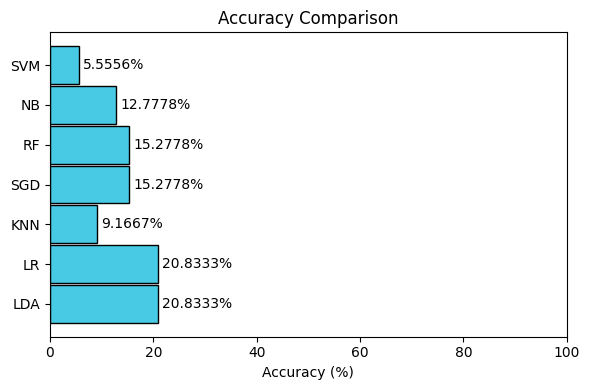

In [ ]:
# Perform classification for the first person after dropping the least important labels on the basis of high activation values and PCA
model_blackbox(X_pca, yr)